# Problem statement.
From World Health Organization - On 31 December 2019, WHO was alerted to several cases of pneumonia in Wuhan City, Hubei Province of China. The virus did not match any other known virus. This raised concern because when a virus is new, we do not know how it affects people.

So daily level information on the affected people can give some interesting insights when it is made available to the broader data science community. data is available from 1/22/2020  to 2/17/2020.

This notebook contain the model fitting of no of people who got corona virus and proved to be confirmed 

And then predict the future possible number of patients.

Source of dataset: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset.

First i made some visualizations and then stationarity checking and then models.



In [1]:
# importing some important libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
import itertools
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

from math import sqrt

import matplotlib

In [2]:
df = pd.read_csv('./novel-corona-virus-2019-dataset_new/covid_19_data.csv',parse_dates=['Last Update'])

In [3]:
#printing first 5 values of dataset.
df.columns = ['Sno','Date','Province/State','Country','Last Update','Confirmed','Deaths','Recovered']
df.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [4]:
#printing last 5 values of dataset.
df.tail()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
13204,13205,04/08/2020,Wyoming,US,2020-04-08 22:59:00,221.0,0.0,0.0
13205,13206,04/08/2020,Xinjiang,Mainland China,2020-04-08 22:59:00,76.0,3.0,73.0
13206,13207,04/08/2020,Yukon,Canada,2020-04-08 22:59:00,7.0,0.0,0.0
13207,13208,04/08/2020,Yunnan,Mainland China,2020-04-08 22:59:00,184.0,2.0,173.0
13208,13209,04/08/2020,Zhejiang,Mainland China,2020-04-08 22:59:00,1266.0,1.0,1232.0


In [5]:
df2 = df.groupby(["Date", "Country"])[['Date', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

# COUNTRIES EFFECTED

#### A total of 34 countries affected.


In [6]:
all_countries = df['Country'].unique()
print("Number of countries with cases: " + str(len(all_countries)))
print("Countries with cases: ")
for i in all_countries:
    print("    " + str(i))

Number of countries with cases: 219
Countries with cases: 
    Mainland China
    Hong Kong
    Macau
    Taiwan
    US
    Japan
    Thailand
    South Korea
    Singapore
    Philippines
    Malaysia
    Vietnam
    Australia
    Mexico
    Brazil
    Colombia
    France
    Nepal
    Canada
    Cambodia
    Sri Lanka
    Ivory Coast
    Germany
    Finland
    United Arab Emirates
    India
    Italy
    UK
    Russia
    Sweden
    Spain
    Belgium
    Others
    Egypt
    Iran
    Israel
    Lebanon
    Iraq
    Oman
    Afghanistan
    Bahrain
    Kuwait
    Austria
    Algeria
    Croatia
    Switzerland
    Pakistan
    Georgia
    Greece
    North Macedonia
    Norway
    Romania
    Denmark
    Estonia
    Netherlands
    San Marino
     Azerbaijan
    Belarus
    Iceland
    Lithuania
    New Zealand
    Nigeria
    North Ireland
    Ireland
    Luxembourg
    Monaco
    Qatar
    Ecuador
    Azerbaijan
    Czech Republic
    Armenia
    Dominican Republic
    Indonesia
   

In [7]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
confirmed.columns = ['Date','Confirmed']
confirmed['Date'] = pd.to_datetime(confirmed['Date'])
confirmed=confirmed.set_index("Date")

deaths = df.groupby('Date').sum()['Deaths'].reset_index()
deaths.columns = ['Date',"Deaths"]
deaths['Date'] = pd.to_datetime(deaths['Date'])
deaths=deaths.set_index("Date")

recovered= df.groupby('Date').sum()['Recovered'].reset_index()
recovered.columns = ['Date',"Recovered"]
recovered['Date'] = pd.to_datetime(recovered['Date'])
recovered=recovered.set_index("Date")


In [8]:
print(confirmed.isnull().sum())
print(deaths.isnull().sum())
print(recovered.isnull().sum())

Confirmed    0
dtype: int64
Deaths    0
dtype: int64
Recovered    0
dtype: int64


### NOTE:(for entire notebook)

- #### blue colour line in graph indicates original data.

- #### red colour line in graph indicates mean in respective method.

- #### black colour line in graph indicates Standard deviation in respective method.

- #### orange colour line in graph indicates predicted data
 


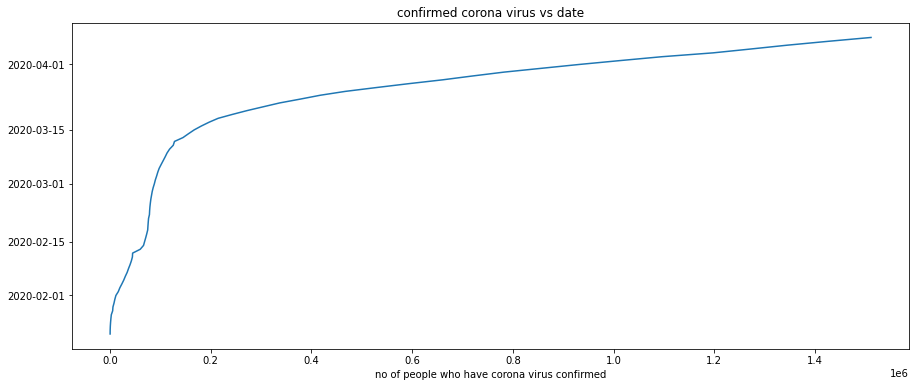

In [9]:
x=confirmed['Confirmed']
y=confirmed.index
plt.figure(figsize=(15,6))
from pandas.plotting import register_matplotlib_converters
plt.title('confirmed corona virus vs date')
plt.xlabel('no of people who have corona virus confirmed')
plt.plot(x,y);

#### From the above graph we can say that the data is keep on increasing and hence non stationary data.
#### It has some dependency on time.

#### So we need to remove this non stationarity to apply model.

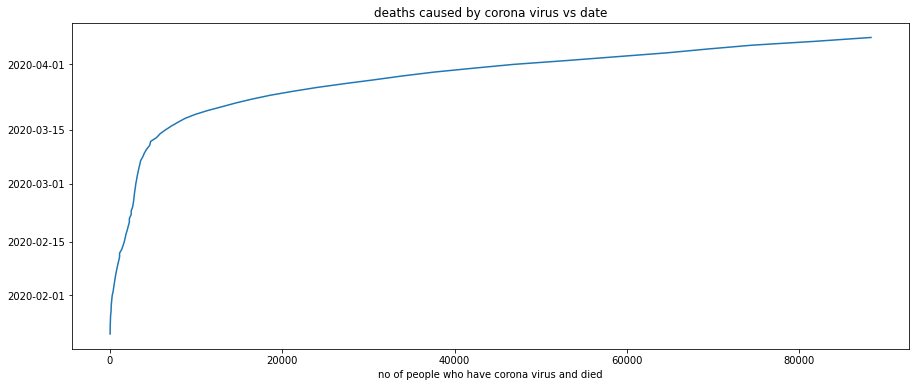

In [10]:
x=deaths['Deaths']
y=deaths.index
plt.figure(figsize=(15,6))
plt.title('deaths caused by corona virus vs date')
plt.xlabel('no of people who have corona virus and died')
plt.plot(x,y);

The above graph is only for information. Nothing to do with prediction .

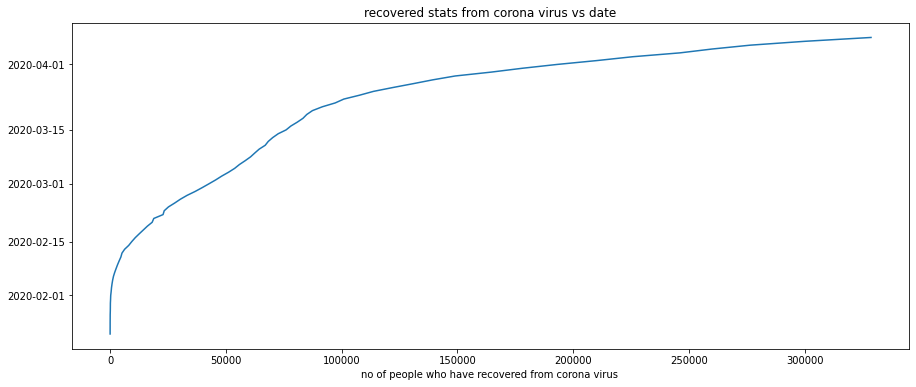

In [11]:
x=recovered['Recovered']
y=recovered.index
plt.figure(figsize=(15,6))
plt.title('recovered stats from corona virus vs date')
plt.xlabel('no of people who have recovered from corona virus ')
plt.plot(x,y);

The above graph is only for information. Nothing to do with prediction .

<Figure size 432x288 with 0 Axes>

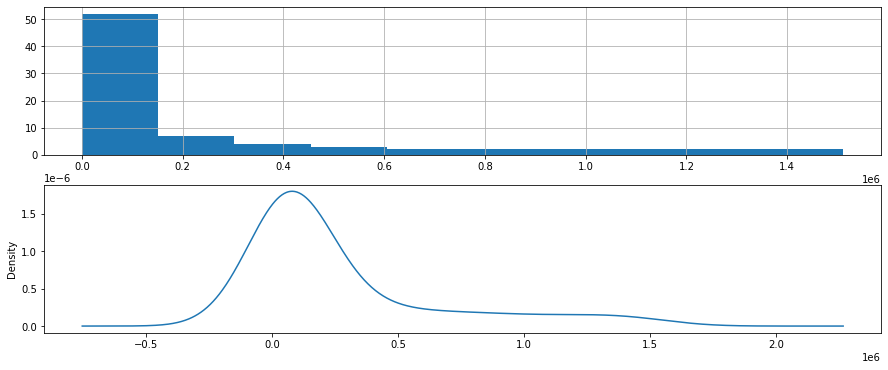

In [12]:
from pandas import Series
from matplotlib import pyplot
pyplot.figure(1)
plt.figure(figsize=(15,6))

pyplot.subplot(211)
confirmed.Confirmed.hist()
pyplot.subplot(212)
confirmed.Confirmed.plot(kind='kde')
pyplot.show()



#### The above Graph shows us the density of the given data. A lot of dates have number of people got infected is in range (1,10000).

#### This above graph gives us the view the variance  of data.


# Stationarity
---A Time Series is said to be stationary if its statistical properties such as mean, variance remain constant over time.

---Most of the Time Series models work on the assumption that the TS is stationary. Major reason for this is that there are many ways in which a series can be non-stationary, but only one way for stationarity.

---Intuitively, we can say that if a Time Series has a particular behaviour over time, there is a very high probability that it will follow the same in the future.

---Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.


---We can use statsmodels to perform a decomposition of this time series.

---The decomposition of time series is a statistical task that deconstructs a time series into several components, each representing one of the underlying categories of patterns.

---With statsmodels we will be able to see the trend, seasonal, and residual components of our data.

## we will see some methods to find stationarity.

-1. Decomposition

-2. ACF and PACF plots.

-3. Plotting rolling statistics.


-4. Augmented Dickey fuller test

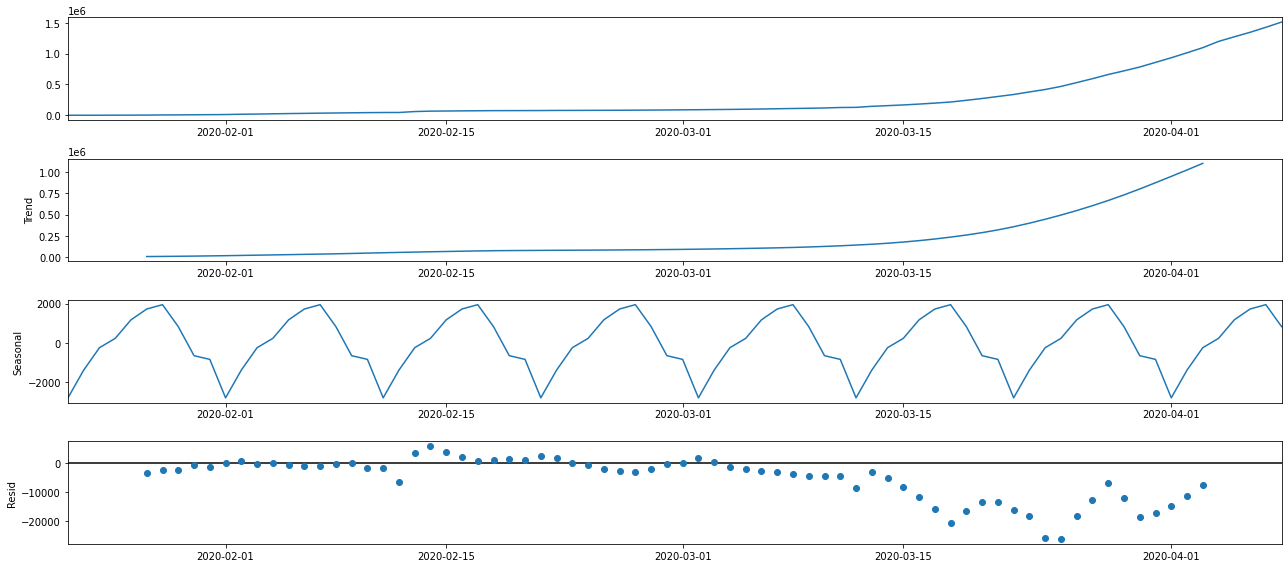

In [13]:
# Decomposition process is very important for every problem. It gives usa lot of inference.
from pylab import rcParams
rcParams['figure.figsize'] = (18, 8)
confirmed.index = pd.to_datetime(confirmed.index)
decomposition = sm.tsa.seasonal_decompose(confirmed,period=10)
fig = decomposition.plot()
plt.show()

####  From the above graph we can see that mean increases with time. Hence from this we can confirm that the given data is stationary.  Seasonal parameter is not so varying . So no need to consider seasonal parameters here.




# ACF and PACF plots
---Let's review the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots

---If the time series is stationary, the ACF/PACF plots will show a quick drop-off in correlation after a small amount of lag between points.

---The data is non-stationary if a high number of previous observations are correlated with future values.

---Confidence intervals are drawn as a cone.

---By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this 
code are very likely a correlation and not a statistical fluke.

---The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

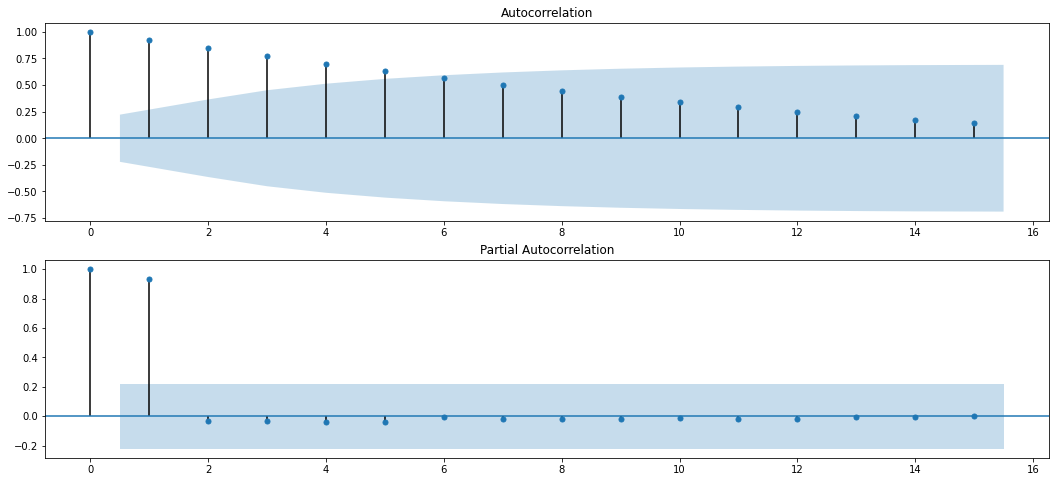

In [14]:

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

pyplot.figure()
pyplot.subplot(211)
plot_acf(confirmed.Confirmed, ax=pyplot.gca(), lags = 15)
pyplot.subplot(212)
plot_pacf(confirmed.Confirmed, ax=pyplot.gca(), lags = 15)
pyplot.show()

#### from the above ACF graph we can say that, the graph doesn't converge to zero before reaching confidence interval, which indicates stationarity.

# Plotting Rolling Statistics

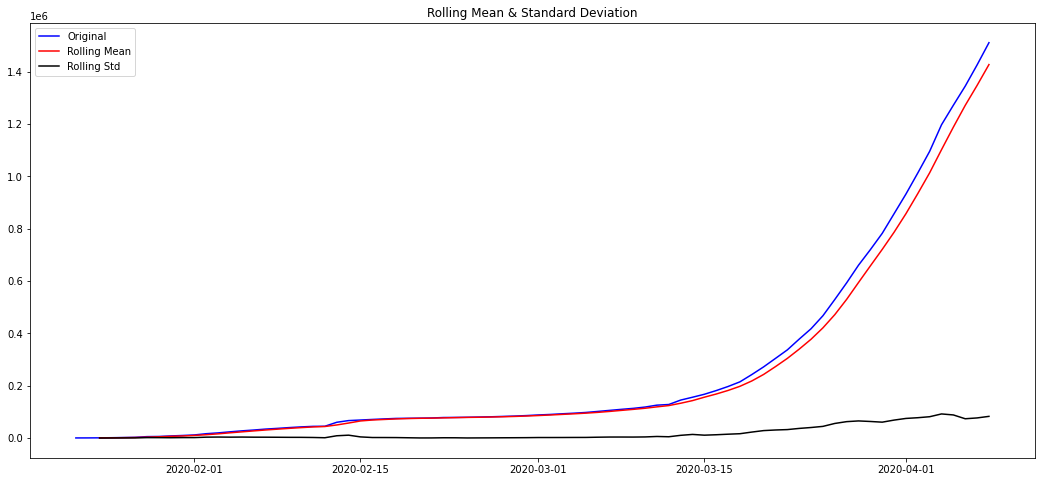

In [15]:
#rolmean = pd.rolling_mean(confirmed, window=12)
#rolstd = pd.rolling_std(confirmed, window=12)
rolmean = confirmed.rolling(3).mean()
rolstd = confirmed.rolling(3).std()


#Plot rolling statistics:
orig = plt.plot(confirmed, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

#### Again from the above graph we can infer rolling average is increaing and moving statndard deviation not changes much.


# Augmented Dickey-Fuller Test

The intuition behind the test is that if the series is integrated then the lagged level of the series y(t-1) will provide no relevant information in predicting the change in y(t).

Null hypothesis: The time series is not stationary

Rejecting the null hypothesis (i.e. a very low p-value) will indicate stationarity

In [16]:
from statsmodels.tsa.stattools import adfuller
#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(confirmed.Confirmed, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  1.658523
p-value                         0.998023
#Lags Used                     11.000000
Number of Observations Used    66.000000
Critical Value (1%)            -3.533560
Critical Value (5%)            -2.906444
Critical Value (10%)           -2.590724
dtype: float64


#### Low value of p-value indicates stationarity . But it is quite high which infers non stationarity.

In [17]:
### AN OVERALL FUNCTION TO CHECK STATIONARITY.

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(5).mean()
    rolstd = timeseries.rolling(5).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#### From the above methods we can say that the given data have varying mean. So we need to remove that moving average and make data stationary to apply models.

#### Also here for this data set a very little change in variance. So we may neglect removing variance.  

# Techniques to remove Trend - Smoothing¶

### 1.log scale transformation

We can apply transformation which penalize higher values more than smaller values. These can be taking a log, square root, cube root, etc

### 2.Exponential tranformation
### 3.Box Cox transformation
### 4.Square root transformation



## Lets apply exponential transformation

An exponentially weighted smoother is obtained by introducing a discount factor.
We see that the previous observations are penalised or discounted in a geometrically decreased manner.
We need to take care of weights average term.


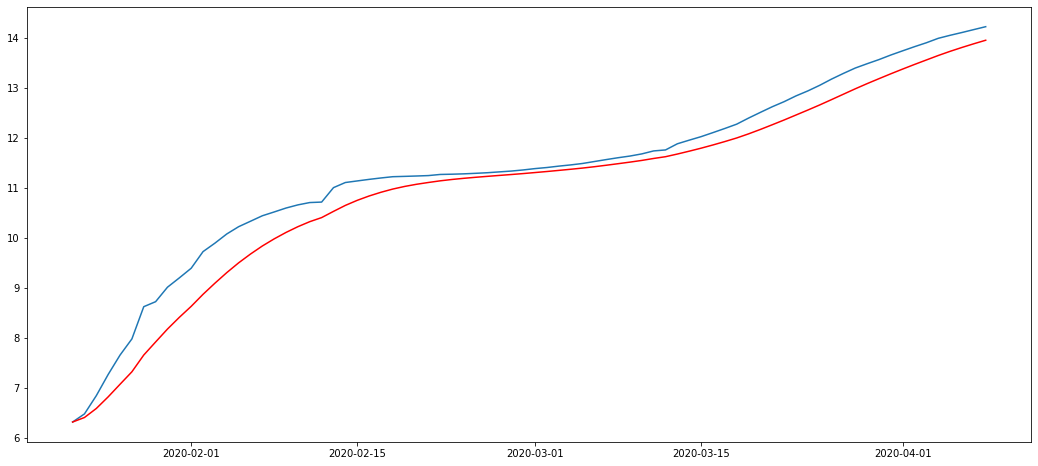

In [18]:
ts_log = np.log(confirmed)

expwighted_avg = pd.DataFrame.ewm(ts_log, halflife=3).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')



#### we have applied exponential transformation here . then below i calculated resultant values and checked for if any non stationarity remained or not.

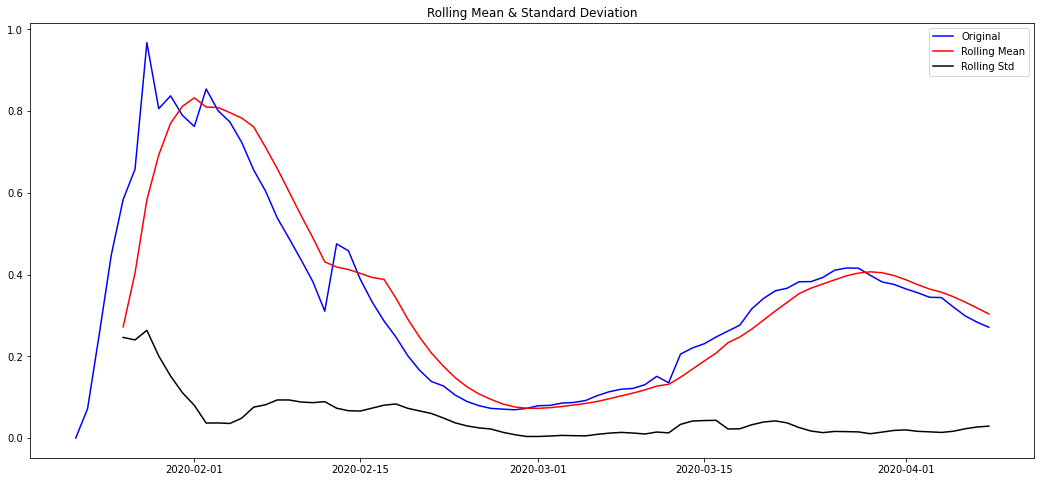

Results of Dickey-Fuller Test:
Test Statistic                 -1.750676
p-value                         0.405210
#Lags Used                      1.000000
Number of Observations Used    76.000000
Critical Value (1%)            -3.519481
Critical Value (5%)            -2.900395
Critical Value (10%)           -2.587498
dtype: float64


In [19]:
ts_log_ewma_diff = ts_log.Confirmed - expwighted_avg.Confirmed
test_stationarity(ts_log_ewma_diff)


#### Now we have p-value as very less. So we can go further with model implementation as data became stationary.

#### We have many methods to remove stationarity . we can go with any of them . But we need to check the stationarity of resultant data.

# Autoregression (AR)

The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps.

Number of AR (Auto-Regressive) terms (p): p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values i.e lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

/home/t/.local/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


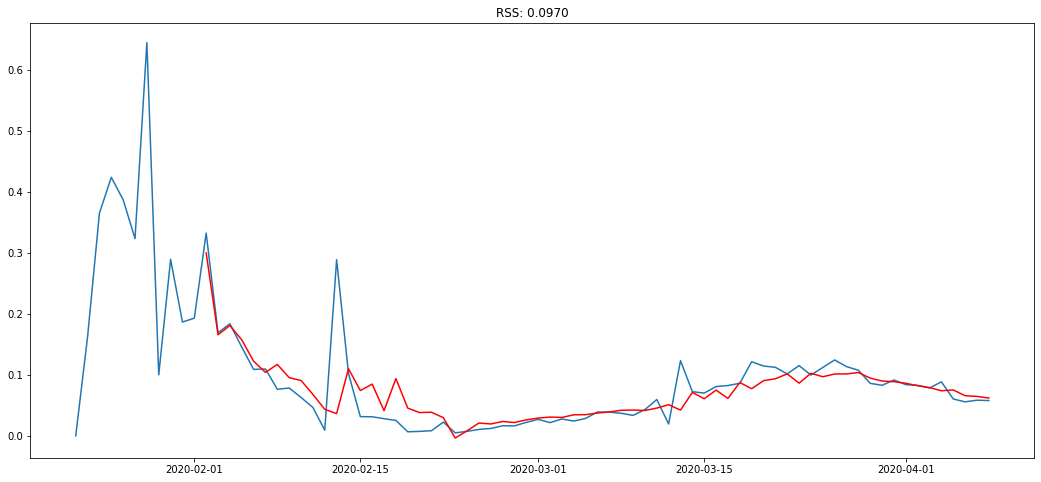

In [20]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

ts_log_diff = ts_log.Confirmed - ts_log.Confirmed.shift()
ts_log_diff = ts_log_diff.fillna(0)
import datetime as dt
from statsmodels.tsa.ar_model import AR
from random import random

z= pd.date_range(start='1/22/2020', end='04/08/2020')    
model = AR(ts_log_diff, dates=z,freq='D')
model_fit = model.fit()

plt.plot(ts_log_diff)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% np.nansum((model_fit.fittedvalues-ts_log_diff)**2))
plt.show()

## Reversing the transformations

In [21]:
predictions_ARIMA_diff = pd.Series(model_fit.fittedvalues, copy=True)


In [22]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()


In [23]:

predictions_ARIMA_log = pd.Series(ts_log.Confirmed.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)


In [24]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

Text(0.5, 1.0, 'RMSE: 439279.4436')

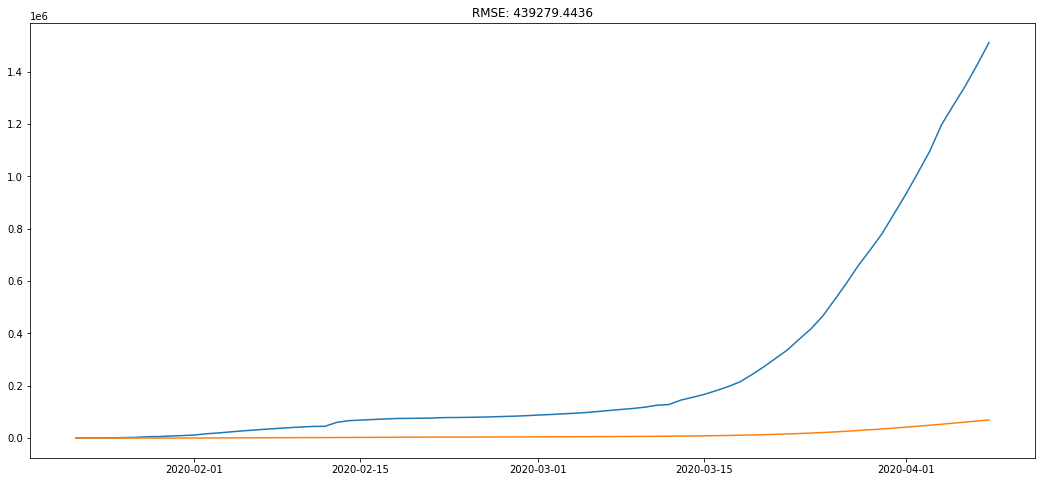

In [25]:
plt.plot(confirmed.Confirmed)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(np.nansum((predictions_ARIMA-confirmed.Confirmed)**2)/len(confirmed.Confirmed)))

#### We already know that our data has not much variance. Hence we got a nearly constant newly obtained values. i.e Nothing to do with regression. Our root mean square error is also so high.

In [26]:
from statsmodels.tsa.arima_model import ARMA
from random import random

# fit model
ts_log_diff.index = z
model = ARMA(ts_log_diff, order=(1, 0))
model_fit = model.fit(disp=False)

In [27]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              Confirmed   No. Observations:                   78
Model:                     ARMA(1, 0)   Log Likelihood                  79.962
Method:                       css-mle   S.D. of innovations              0.087
Date:                Thu, 09 Apr 2020   AIC                           -153.925
Time:                        23:57:35   BIC                           -146.855
Sample:                    01-22-2020   HQIC                          -151.094
                         - 04-08-2020                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0985      0.025      3.868      0.000       0.049       0.148
ar.L1.Confirmed     0.6227      0.088      7.112      0.000       0.451       0.794
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6060           +0.0000j            1.6060            0.0000
-----------------------------------------------------------------------------
"""

Above block is summary of the model AR .which is nothing but ARMA(1,0).

## Note: 
#### We need to change the parameters of model(?,?) according to the result table.(Example: AR(), ARMA() etc..)

The model summary reveals a lot of information. The table in the middle is the coefficients table where the values under ‘coef’ are the weights of the respective terms.

The P-Value in ‘P>|z|’ column should ideally be less than 0.05 for the respective X to be significant.


Text(0.5, 1.0, 'RSS: 0.5878')

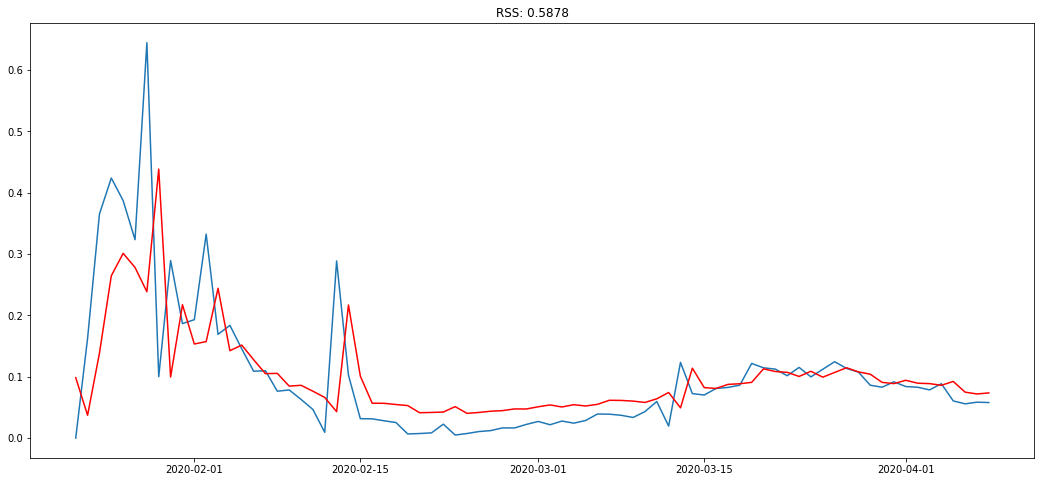

In [28]:

plt.plot(ts_log_diff)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% np.nansum((model_fit.fittedvalues-ts_log_diff)**2))

#### from the above image we can see RSS value is less. Hence this model is good.

# Autoregressive Moving Average (ARMA)

Number of AR (Auto-Regressive) terms (p): p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values i.e lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

Number of MA (Moving Average) terms (q): q is size of the moving average part window of the model i.e. lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

In [29]:
from statsmodels.tsa.arima_model import ARMA
from random import random

model = ARMA(ts_log_diff, order=(1,0))
model_fit = model.fit(disp=False)

In [30]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              Confirmed   No. Observations:                   78
Model:                     ARMA(1, 0)   Log Likelihood                  79.962
Method:                       css-mle   S.D. of innovations              0.087
Date:                Thu, 09 Apr 2020   AIC                           -153.925
Time:                        23:57:35   BIC                           -146.855
Sample:                    01-22-2020   HQIC                          -151.094
                         - 04-08-2020                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0985      0.025      3.868      0.000       0.049       0.148
ar.L1.Confirmed     0.6227      0.088      7.112      0.000       0.451       0.794
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6060           +0.0000j            1.6060            0.0000
-----------------------------------------------------------------------------
"""

Text(0.5, 1.0, 'RSS: 0.5878')

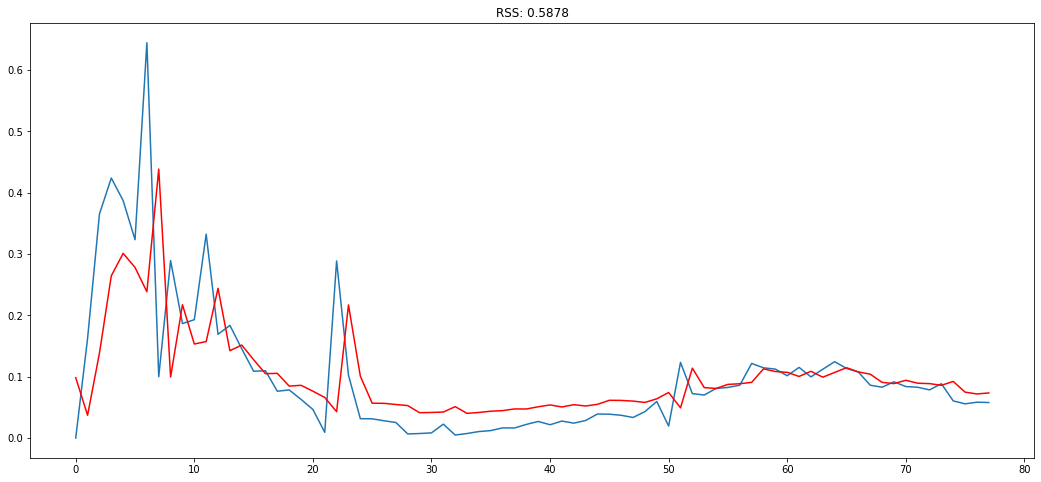

In [31]:

plt.plot(ts_log_diff.values)
plt.plot(model_fit.fittedvalues.values, color='red')
plt.title('RSS: %.4f'% np.nansum((model_fit.fittedvalues-ts_log_diff)**2))

#### we can see that model summary is good for ARMA(1,0) . that is similar to auto regression.

# Autoregressive Integrated Moving Average (ARIMA)¶
### In an ARIMA model there are 3 parameters that are used to help model the major aspects of a times series: seasonality, trend, and noise. These parameters are labeled p,d,and q.

Number of AR (Auto-Regressive) terms (p): p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values i.e lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

Number of Differences (d): d is the parameter associated with the integrated part of the model, which effects the amount of differencing to apply to a time series.

Number of MA (Moving Average) terms (q): q is size of the moving average part window of the model i.e. lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.


In [32]:

ts = confirmed.Confirmed - confirmed.Confirmed.shift()
ts.dropna(inplace=True)

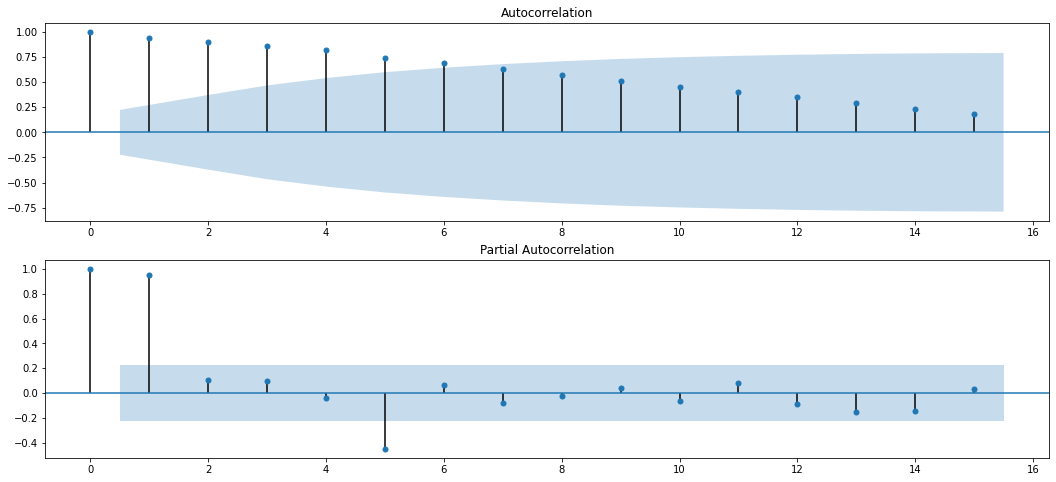

In [33]:
pyplot.figure()
pyplot.subplot(211)
plot_acf(ts, ax=pyplot.gca(),lags=15)
pyplot.subplot(212)
plot_pacf(ts, ax=pyplot.gca(),lags=15)
pyplot.show()

# Interpreting ACF plots
| ACF Shape |	Indicated Model |
|---|---|
| Exponential, decaying to zero |	Autoregressive model. Use the partial autocorrelation plot to identify the order of the autoregressive model	|
|---|---|
| Alternating positive and negative, decaying to zero Autoregressive model. |	Use the partial autocorrelation plot to help identify the order.	|
|---|---|
| One or more spikes, rest are essentially zero	| Moving average model, order identified by where plot becomes zero.	|
|---|---|
| Decay, starting after a few lags  |	Mixed autoregressive and moving average (ARMA) model. |	
|---|---|
| All zero or close to zero  |	Data are essentially random.	|
|---|---|
| High values at fixed intervals |	Include seasonal autoregressive term. |	
|---|---|
| No decay to zero  |	Series is not stationary |

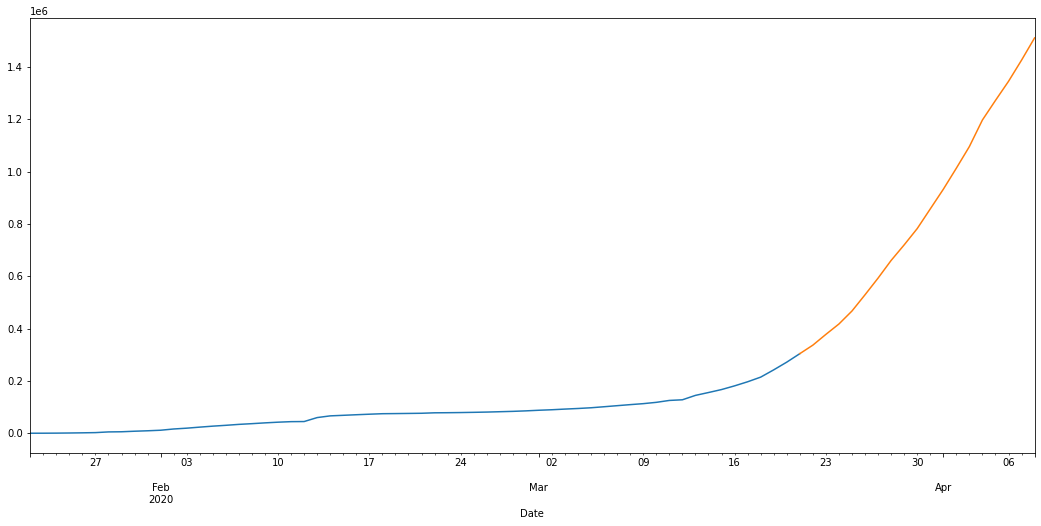

In [34]:
import datetime

train = confirmed[:int(0.75*(len(confirmed))+2)]
valid = confirmed[int(0.75*(len(confirmed)+1)):]

train['Confirmed'].plot()
valid['Confirmed'].plot()

#train.index = train.index.date
#valid.index = valid.index.date


#train.index = pd.to_datetime(train.index)
#valid.index = pd.to_datetime(valid.index)
#a=[]
#for i in range(len(train.index)):
#    a.append(datetime(train.index[i].year,train.index[i].month,train.index[i].day))
#print(type(a[0]))    
#train = train.set_index([a])
#datetime(start_index.year,start_index.month,start_index.day)
train=train.reset_index()
valid=valid.reset_index()

train['Date'] = train['Date'].apply(lambda x: datetime.date(x.year,x.month,x.day))
valid['Date'] = valid['Date'].apply(lambda x: datetime.date(x.year,x.month,x.day))

train.set_index("Date", inplace = True)
valid.set_index("Date", inplace = True)


### The graph of  train and valid data set from the original series

## IMPLEMENTING ARIMA.

Here we ahould keep the value of p=1 and d=1 and q=0 because we need d=1 for removing non stationarity . Ad we don't need q value because of significant change in variance of initial data.



In [35]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
model = ARIMA(train.values, order=(3, 1, 0))
model_fit = model.fit(disp=1)

In [36]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   59
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -564.409
Method:                       css-mle   S.D. of innovations           3371.840
Date:                Thu, 09 Apr 2020   AIC                           1138.818
Time:                        23:57:37   BIC                           1149.206
Sample:                             1   HQIC                          1142.873
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.154e+04   1.09e+04      1.055      0.291   -9895.114     3.3e+04
ar.L1.D.y      0.6542      0.130      5.016      0.000       0.399       0.910
ar.L2.D.y      0.2831      0.150      1.881      0.060      -0.012       0.578
ar.L3.D.y      0.0385      0.132      0.293      0.770      -0.219       0.296
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0180           -0.0000j            1.0180           -0.0000
AR.2           -4.1833           -2.8287j            5.0500           -0.4054
AR.3           -4.1833           +2.8287j            5.0500            0.4054
-----------------------------------------------------------------------------
"""

Here we can change the value of p=1 to 0 because p>|z| is very high for ar parameter.

In [37]:
from sklearn.model_selection import TimeSeriesSplit

predictions = model_fit.predict()
predictions[predictions<0] = 0

predictions=predictions[len(predictions)-18:len(predictions)]



In [38]:
mse = mean_squared_error(confirmed[len(confirmed.Confirmed)-18:len(confirmed.Confirmed)], predictions)
rmse = sqrt(mse)
print('RMSE: {}, MSE:{}'.format(rmse,mse))

RMSE: 927176.1420925414, MSE:859655598465.6086


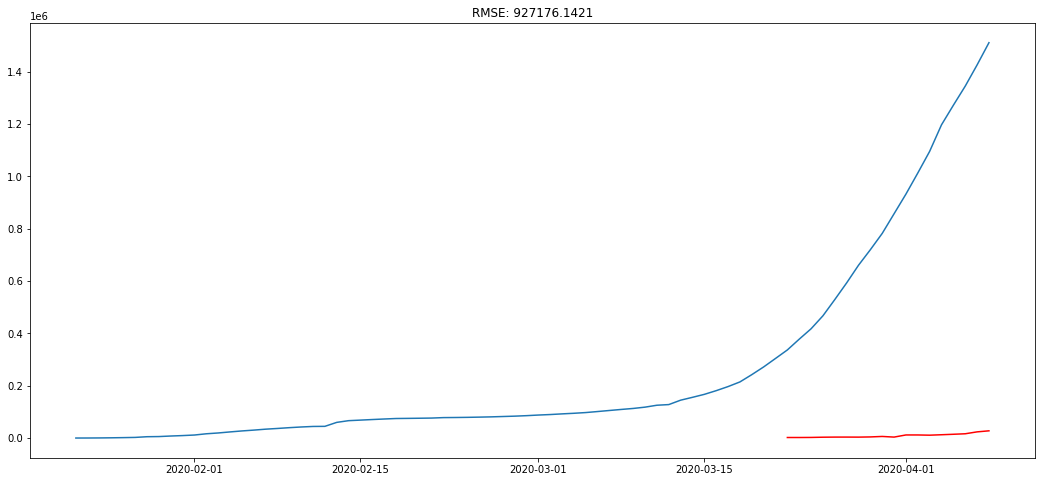

In [39]:
l=confirmed.index[len(confirmed.Confirmed)-18:len(confirmed.Confirmed)]
a=pd.DataFrame()
a["predicted"]=predictions
a=a.set_index(l)
plt.plot(confirmed.Confirmed)
plt.plot(a.predicted, color='red')
plt.title('RMSE: %.4f'% rmse)
plt.show()

### Reversing the calculated values.

In [40]:
predictions_ARIMA_diff_diff = pd.Series(a.predicted, copy=True)



In [41]:
predictions_ARIMA_diff_diff_cumsum = predictions_ARIMA_diff_diff.cumsum()
predictions_ARIMA_diff_diff_cumsum_cumsum = predictions_ARIMA_diff_diff_cumsum.cumsum()


In [42]:
predictions_ARIMA_log = pd.Series(valid.Confirmed.iloc[0], index=valid.index)
predictions_ARIMA_log = predictions_ARIMA_log[1:len(predictions_ARIMA_log )]
predictions_ARIMA_log = predictions_ARIMA_log[predictions_ARIMA_log.values==valid.Confirmed.iloc[0]]
predictions_ARIMA_log = np.add(predictions_ARIMA_log.values,predictions_ARIMA_diff_diff_cumsum_cumsum.values)
predicted_log=pd.DataFrame()
predicted_log['predicted']=predictions_ARIMA_log
predicted_log=predicted_log.set_index(l)


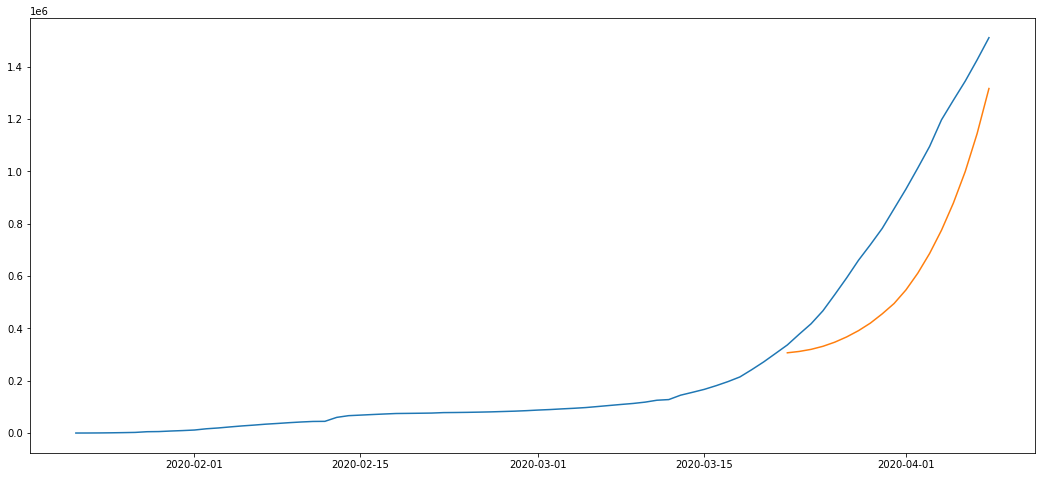

In [43]:
plt.plot(confirmed.Confirmed)
plt.plot(predicted_log)

#plt.title('RMSE: %.4f'% np.sqrt(np.nansum(k)**2)/len(k))
o=(predicted_log).values
j=confirmed.Confirmed[len(confirmed.Confirmed)-10:len(confirmed.Confirmed)].values
#k=[]
#e=0
#for i in range(len(o)):
#    k.append(abs(o[i]-j[i])/j[i])
#    e=e+k[i]*k[i]
#print("RMS error = ", e)   


#### Orange colour line in graph is predicted value. Blue colour line is original value.

#### we can see that the final predicted curve is almost as the given curve.And the error we got is very less.

#### Now using this less error model we can predict  confirmed number of people those will be effected by corona virus in future.

#### hence a model is built by checking all the parameters that may effect our prediction